<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/HEPATITIS_Datacleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**





>***Understanding VAERS data***



1.   VAERS was formed by the FDA and the CDC to gather reports of vaccine-related adverse events. (From November 1, 1990 to the present)
2.   VAERS is used to continuously monitor reports to see if any vaccination or vaccine lot has a greater rate of incidents than expected
3. Approximately 85-90 percent of vaccination adverse event reports are for very modest occurrences like fevers or redness and edema at the injection site. The remaining reports (less than 15%) are about serious incidents including hospitalizations, life-threatening diseases, or fatalities
4. When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset

---







> ***Description of Data Files***


Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)

Data Discription can be found [here](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)

> ***There are three data files:***

VAERSDATA.CSV

VAERSVAX.CSV

VAERSSYMPTOMS.CSV

There are three data types:

NUM = numeric data

CHAR = text or "character" data

DATE = date fields in mm/dd/yy format





> ***VAERS Data Limitations***



When analyzing VAERS data, keep in mind that no cause-and-effect relationship has been proven for any reported occurrence. VAERS receives reports of all possible links between vaccines and adverse events (possible side effects). As a result, VAERS collects information on any adverse event that occurs after immunization, whether it is coincidental or actually caused by the vaccine. A report of an adverse event to VAERS is not proof that the occurrence was caused by the vaccine.

* VAERS is a passive reporting system, which means that reports of adverse events are not collected automatically and must be reported to VAERS. Anyone, including healthcare providers, patients, and family members, can voluntarily submit VAERS reports. The quality and completeness of reports varies. They frequently lack details and, on sometimes, may provide inaccurate information.

* One of the major drawbacks of passive monitoring systems, such as VAERS, is "underreporting." The phrase "underreporting" refers to the reality that only a tiny percentage of genuine adverse events are reported to VAERS. The extent of underreporting differs greatly. For example, many of the millions of immunizations given by injection each year induce pain, yet only a small percentage of these instances result in a VAERS report. Minor side effects of vaccines often include this type of soreness, as well as low fevers, as physicians and patients are aware. Serious and unexpected medical events, on the other hand, are more likely to be reported than minor ones, especially when they occur soon after immunization, even if they are unrelated to the vaccine.

* A report to VAERS does not always imply that the indicated vaccine(s) were to blame for the adverse event. It merely validates that the alleged occurrence happened after the vaccine was administered. VAERS will accept the report without requiring confirmation that the occurrence was caused by the immunization. VAERS accepts all reports without determining if the vaccine was to blame.

In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

## Data Process

### Understaing VAERS Vaccination data

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")

In [ ]:
df_vax.drop('Unnamed: 0',axis=1,inplace=True)
df_vax.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,27274,HIBV,PFIZER\WYETH,M030FC,1,IM,NaN,HIB (HIBTITER)
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
2,27276,DTP,LEDERLE LABORATORIES,0B21173,3,IM L,NaN,DTP (TRI-IMMUNOL)
3,27276,OPV,PFIZER\WYETH,NaN,3,PO,MO,"POLIO VIRUS, ORAL (ORIMUNE)"
4,27277,RAB,PASTEUR MERIEUX INST.,D1186,2,NaN,LA,RABIES (IMOVAX ID)


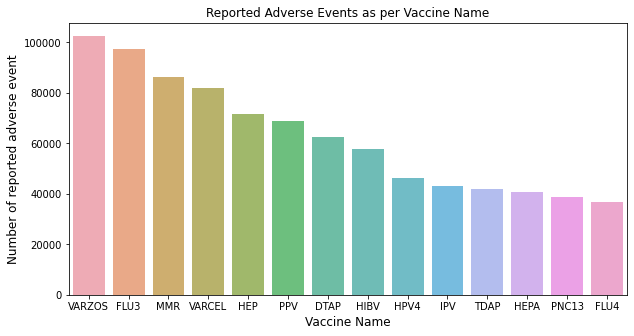

In [ ]:
vax_type  = df_vax['VAX_TYPE'].value_counts().sort_values(ascending=False)[1:15]
vax_type = pd.DataFrame(vax_type)
plt.figure(figsize=(10,5))
sns.barplot(x=vax_type.index, y=vax_type.VAX_TYPE, data=vax_type, alpha=0.8)
plt.title('Reported Adverse Events as per Vaccine Name')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Vaccine Name', fontsize=12)
plt.show()

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420759 entries, 0 to 2420758
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 147.8+ MB


### Understaing VAERS Symptoms data

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")

In [ ]:
df_symp.drop('Unnamed: 0',axis=1,inplace=True)
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596826 entries, 0 to 2596825
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 217.9+ MB


### Understaing VAERS patient info data

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")

In [ ]:
df_data.drop('Unnamed: 0',axis=1,inplace=True)
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,27274,01/02/1991,CA,1.5,NaN,NaN,F,NaN,Pt vaccinated with HIB titer developed meningi...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,Y,11/28/1990,11/28/1990,0.0,CSF & blood culture positive for HIB,UNK,UNK,NaN,Had URI at time of injection,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,11/26/1990,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,NaN,OTH,OTH,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
2,27276,01/02/1991,GA,0.6,0.0,0.6,F,12/14/1990,Pt vaccinated with DTP/OPV developed fever 105...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,U,12/11/1990,12/11/1990,0.0,CBC normal,PVT,PVT,NaN,mild otitis media,otitis media,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
3,27277,01/02/1991,NY,37.0,37.0,NaN,F,12/05/1990,"Pt vacc. w/ Rabies developed backache, very pa...",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,N,11/13/1990,11/14/1990,1.0,CBC-SMA-23 CPK 19 NOV; CBC- Diff seg rate SMA...,PVT,PVT,NaN,NaN,NaN,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
4,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,NaN,PVT,PVT,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951645 entries, 0 to 1951644
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   VAERS_ID      int64  
 1   RECVDATE      object 
 2   STATE         object 
 3   AGE_YRS       float64
 4   CAGE_YR       float64
 5   CAGE_MO       float64
 6   SEX           object 
 7   RPT_DATE      object 
 8   SYMPTOM_TEXT  object 
 9   DIED          object 
 10  DATEDIED      object 
 11  L_THREAT      object 
 12  ER_VISIT      object 
 13  HOSPITAL      object 
 14  HOSPDAYS      float64
 15  X_STAY        object 
 16  DISABLE       object 
 17  RECOVD        object 
 18  VAX_DATE      object 
 19  ONSET_DATE    object 
 20  NUMDAYS       float64
 21  LAB_DATA      object 
 22  V_ADMINBY     object 
 23  V_FUNDBY      object 
 24  OTHER_MEDS    object 
 25  CUR_ILL       object 
 26  HISTORY       object 
 27  PRIOR_VAX     object 
 28  SPLTTYPE      object 
 29  FORM_VERS     int64  
 30  TODAYS_DATE   obje

### Data Exploration 

In [ ]:
print(df_data["VAERS_ID"].nunique())
print(df_symp["VAERS_ID"].nunique())
print(df_vax["VAERS_ID"].nunique())

1951645
1951386
1951644


In [ ]:
print(df_data.shape)
print(df_symp.shape)
print(df_vax.shape)

(1951645, 35)
(2596826, 11)
(2420759, 8)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


## HEPATITIS Vaccine Data Exploration

### HEPATITIS VAERS vaccine data

In [ ]:
# Filtering onlyHEPATITIS Vaccine info
df_Hep_vax =  df_vax[(df_vax['VAX_TYPE'] =='HEP') | (df_vax['VAX_TYPE'] =='HEPA') | (df_vax['VAX_TYPE'] =='HEPAB') | (df_vax['VAX_TYPE'] =='HEPATYP')]
print(df_Hep_vax["VAERS_ID"].nunique())

113692


In [ ]:
df_Hep_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
34,27294,HEP,MERCK & CO. INC.,03585,1,IM,RA,HEP B (RECOMBIVAX HB)
98,27331,HEP,MERCK & CO. INC.,49335,UNK,NaN,NaN,HEP B (RECOMBIVAX HB)
125,27348,HEP,MERCK & CO. INC.,NaN,UNK,IM,NaN,HEP B (RECOMBIVAX HB)
126,27349,HEP,MERCK & CO. INC.,0359S,UNK,NaN,NaN,HEP B (RECOMBIVAX HB)
127,27350,HEP,MERCK & CO. INC.,NaN,UNK,NaN,NaN,HEP B (FOREIGN)


In [ ]:
sanitycheck(df_Hep_vax)

,Column,Unique,Null Count,Null Percentage
3,VAX_LOT,18839,34039,28.87
6,VAX_SITE,12,33097,28.07
5,VAX_ROUTE,16,25608,21.72
4,VAX_DOSE_SERIES,9,41,0.03
0,VAERS_ID,113692,0,0.00
1,VAX_TYPE,4,0,0.00
2,VAX_MANU,6,0,0.00
7,VAX_NAME,13,0,0.00


VAX_SITE,VAX_ROUTE,VAX_LOT has significant null values

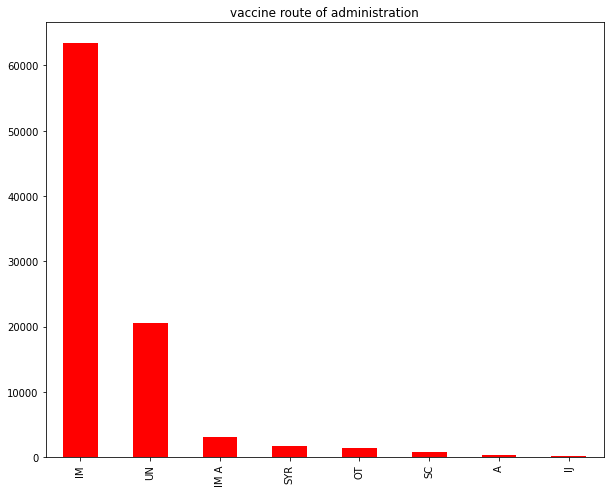

In [ ]:
plt.figure(figsize=(10,8))
route = df_Hep_vax['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:8]
route.plot(kind='bar', title='vaccine route of administration',color="r")

1.   IM : Intramuscular
2.   OT : Other
3.   SYR : Needle and syringe 
4.   UN  : Unknown
5.   SC  : Subcutaneous



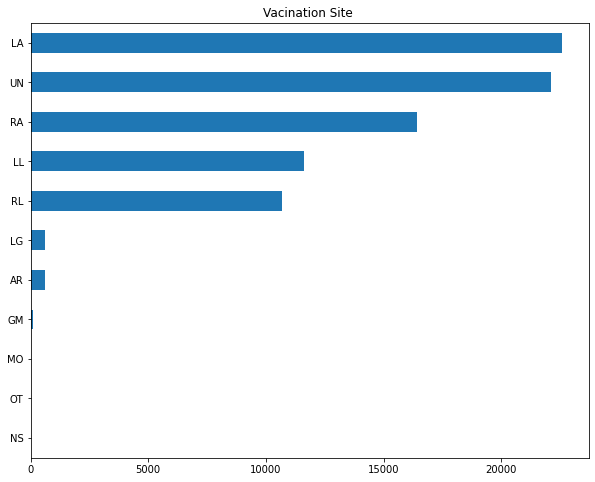

In [ ]:
plt.figure(figsize=(10,8))
site = df_Hep_vax['VAX_SITE'].value_counts().sort_values(ascending=True)[-20:]
site.plot(kind='barh', title='Vacination Site ')

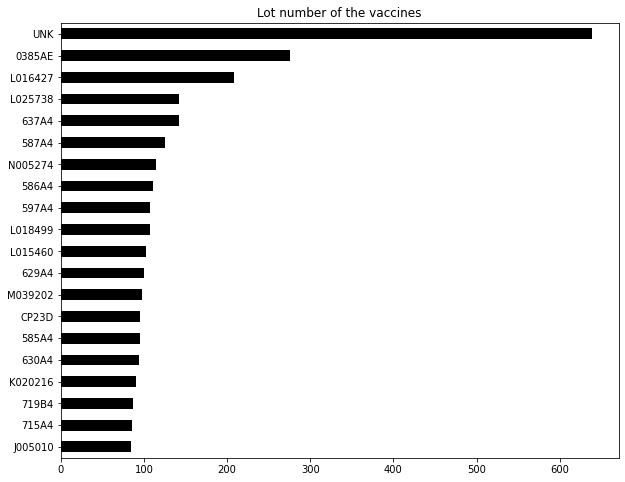

In [ ]:
plt.figure(figsize=(10,8))
lot = df_Hep_vax['VAX_LOT'].value_counts().sort_values(ascending=True)[-20:]
lot.plot(kind='barh', title='Lot number of the vaccines',color="black")

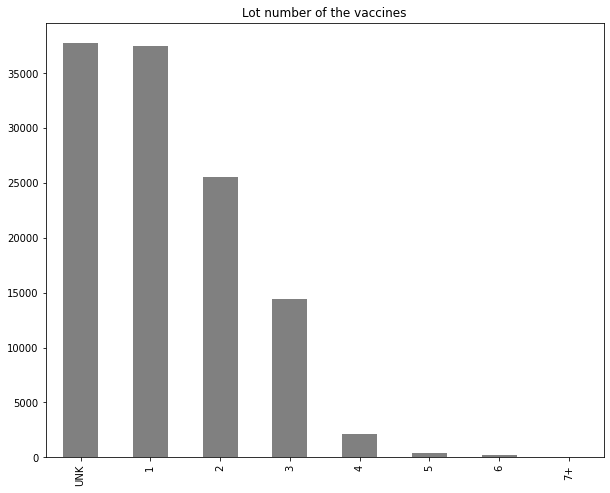

In [ ]:
plt.figure(figsize=(10,8))
lot = df_Hep_vax['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-20:]
lot.plot(kind='bar', title='Lot number of the vaccines',color="grey")

After Observing all the graphs above there is no signifiant information which can be used for our analysis so we will be dropping the column

In [ ]:
df_Hep_vax = df_Hep_vax.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])
df_Hep_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME
34,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
98,27331,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
125,27348,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
126,27349,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
127,27350,HEP,MERCK & CO. INC.,HEP B (FOREIGN)


In [ ]:
df_Hep_vax.drop_duplicates( keep="first", inplace=True)
df_Hep_vax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117120 entries, 34 to 2419414
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  117120 non-null  int64 
 1   VAX_TYPE  117120 non-null  object
 2   VAX_MANU  117120 non-null  object
 3   VAX_NAME  117120 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
vax_count  = df_Hep_vax['VAX_MANU'].value_counts()
vax_count = pd.DataFrame(vax_count)
vax_count['percent'] = round((vax_count['VAX_MANU'] / vax_count['VAX_MANU'].sum()) * 100,2)
vax_count

,VAX_MANU,percent
MERCK & CO. INC.,45177,38.57
GLAXOSMITHKLINE BIOLOGICALS,40488,34.57
SMITHKLINE BEECHAM,20163,17.22
UNKNOWN MANUFACTURER,10608,9.06
DYNAVAX TECHNOLOGIES CORPORATION,541,0.46
SANOFI PASTEUR,143,0.12


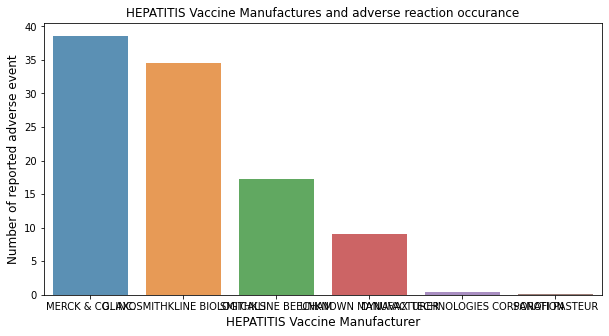

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=vax_count.index, y=vax_count.percent, data=vax_count, alpha=0.8)
plt.title('HEPATITIS Vaccine Manufactures and adverse reaction occurance')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('HEPATITIS Vaccine Manufacturer', fontsize=12)
plt.show()

In [ ]:
g_index = df_Hep_vax['VAX_MANU'].value_counts().index
g_value = df_Hep_vax['VAX_MANU'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

As Unknown Manufacturer is as negliable so we can remove the unknown manufacturer

In [ ]:
df_Hep_vax = df_Hep_vax[~df_Hep_vax['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

In [ ]:
Hep_vaersid = df_Hep_vax.VAERS_ID.unique().tolist()

### Hep VAERS Patient data  

In [ ]:
# Merging Vaccine and Patient data
df_Hep = df_data.merge(df_Hep_vax, on="VAERS_ID",how='right')
df_Hep.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
0,27294,01/04/1991,OH,33.0,33.0,NaN,F,11/26/1990,Pt vaccinated with Recombivax developed nausea...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,11/07/1990,11/07/1990,0.0,ABG's,PUB,PUB,"Ansaid, Vit B12",NaN,h/o of asthma; treatment for OL & drug use 1 y...,~ ()~~~In patient,OH9059,1,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
1,27331,01/07/1991,NY,33.0,NaN,NaN,F,NaN,Pt vaccinated with Recombivax HB experienced a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,11/23/1990,11/23/1990,0.0,NaN,UNK,UNK,"Dilantin, Tegretol",NaN,Hx of Epilepsy,~ ()~~~In patient,WAES90111208,1,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
2,27348,01/08/1991,PA,22.0,NaN,NaN,M,NaN,Pt w/ G-6-PD vaccinated w/Recombivax HB. Deve...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,U,11/06/1990,11/12/1990,6.0,TSB 15NOV90 8.9; SGOT 15NOV90 370; SGPT 15NOV9...,UNK,UNK,NaN,NaN,G-6-pd deficiency,~ ()~~~In patient,WAES90102791,1,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
3,27349,01/08/1991,MT,NaN,NaN,NaN,F,NaN,Pt vaccinated with Recombivax HB developed dia...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,U,11/19/1990,12/03/1990,14.0,Stool Culture - Salmonellosis,UNK,UNK,NaN,NaN,NaN,~ ()~~~In patient,WAES90120890,1,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB)
4,27350,01/08/1991,FL,50.0,50.0,NaN,F,NaN,Pt vaccinated with Heptavax-B developed angion...,NaN,NaN,NaN,Y,Y,NaN,NaN,Y,U,04/16/1990,NaN,NaN,Pulmonary function 1990 Bronchospasm; Lung bio...,UNK,UNK,NaN,NaN,NaN,~ ()~~~In patient,WAES90120585,1,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (FOREIGN)


In [ ]:
df_Hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106512 entries, 0 to 106511
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      106512 non-null  int64  
 1   RECVDATE      106512 non-null  object 
 2   STATE         97788 non-null   object 
 3   AGE_YRS       87289 non-null   float64
 4   CAGE_YR       73098 non-null   float64
 5   CAGE_MO       24804 non-null   float64
 6   SEX           106512 non-null  object 
 7   RPT_DATE      84190 non-null   object 
 8   SYMPTOM_TEXT  106452 non-null  object 
 9   DIED          1205 non-null    object 
 10  DATEDIED      1016 non-null    object 
 11  L_THREAT      2014 non-null    object 
 12  ER_VISIT      27609 non-null   object 
 13  HOSPITAL      10305 non-null   object 
 14  HOSPDAYS      5505 non-null    float64
 15  X_STAY        1031 non-null    object 
 16  DISABLE       3302 non-null    object 
 17  RECOVD        100346 non-null  object 
 18  VAX_

In [ ]:
print(df_Hep["VAERS_ID"].nunique())

103640


In [ ]:
df_Hep[df_Hep.duplicated(['VAERS_ID'])]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
13352,80977,01/22/1996,MI,49.0,49.0,NaN,M,01/18/1996,pt states had phlebitis in lt leg 2 days p/vax...,NaN,NaN,NaN,NaN,Y,11.0,NaN,NaN,Y,11/20/1995,11/22/1995,2.0,"doppler of lt leg, arteriogram showed no clot",OTH,OTH,Pentasa;cortofoam enema,"phlebitis, colitis","PCN allergy, ing heartbeat, colitis",NONE~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN,HEPA,SMITHKLINE BEECHAM,HEP A (HAVRIX)
14088,84759,02/27/1996,IN,65.0,NaN,NaN,F,NaN,"pt recv vax;2 days p/ vaccine,pt recv allergy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,no relevant data,OTH,OTH,allergy shots,NaN,allergy yeast; allergy mildew; allergy seasonal;,~ ()~~~In patient,WAES95100297,1,NaN,NaN,NaN,NaN,NaN,HEPA,SMITHKLINE BEECHAM,HEP A (HAVRIX)
14801,87843,07/15/1996,NY,39.0,NaN,NaN,M,07/09/1996,pt recv vax & w/in 3-4 min post vax pt fainted...,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,07/03/1996,07/03/1996,0.0,NaN,OTH,OTH,NONE,NONE,NONE,~ ()~~~In patient,960096831,1,NaN,NaN,NaN,NaN,NaN,HEPA,SMITHKLINE BEECHAM,HEP A (HAVRIX)
14834,87933,07/16/1996,AK,7.0,7.0,NaN,F,07/10/1996,"2JUL hives noon;eve t102, stomachache, no vomi...",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,06/28/1996,07/02/1996,4.0,"strep negative, UA ok, blood test ok;",PVT,PUB,Ritalin in part-non w/in wk of vax,NONE,ADD,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,HEPA,SMITHKLINE BEECHAM,HEP A (HAVRIX)
14891,88204,07/29/1996,AK,8.0,8.0,NaN,M,07/24/1996,28JUN96 9AM pt recv vax & 15JUL96 onset shingl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/28/1996,07/15/1996,17.0,NONE,PUB,OTH,NaN,NONE,NONE,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,HEPA,SMITHKLINE BEECHAM,HEP A (HAVRIX)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106426,1722306,09/22/2021,FR,NaN,NaN,NaN,F,NaN,There was massive pain and temporary paralysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,OTH,NaN,NaN,NaN,NaN,NaN,ATGLAXOSMITHKLINEAT202119,2,09/22/2021,NaN,NaN,NaN,NaN,HEPAB,GLAXOSMITHKLINE BIOLOGICALS,HEP A + HEP B (TWINRIX)
106451,1818948,10/26/2021,FR,NaN,NaN,NaN,F,NaN,Short of breath; Anxiety; Pressure chest; This...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,U,11/11/2011,12/28/2011,47.0,Test Name: ECG; Result Unstructured Data: (Tes...,UNK,NaN,NaN,NaN,NaN,NaN,DEGLAXOSMITHKLINEDE202122,2,10/26/2021,NaN,NaN,NaN,NaN,HEPAB,GLAXOSMITHKLINE BIOLOGICALS,HEP A + HEP B (TWINRIX)
106465,1847314,11/05/2021,FR,NaN,29.0,NaN,F,NaN,spastic tetraplegia; new flare-up/ flare-up oc...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,04/01/1995,08/01/1995,122.0,Test Name: laboratory test; Result Unstructure...,UNK,NaN,NaN,NaN,NaN,NaN,FRGLAXOSMITHKLINEFR2021EM,2,11/05/2021,NaN,NaN,NaN,NaN,HEP,SANOFI PASTEUR,HEP B (GENHEVAC B)
106475,1900339,11/25/2021,FR,NaN,NaN,NaN,U,NaN,This initial spontaneous report was received f...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,OTH,NaN,NaN,NaN,Medical History/Concurrent Conditions: Mosquit...,NaN,FR0095075131808FRA011601,2,11/25/2021,NaN,NaN,NaN,NaN,HEPA,GLAXOSMITHKLINE BIOLOGICALS,HEP A (HAVRIX)


In [ ]:
sanitycheck(df_Hep)

,Column,Unique,Null Count,Null Percentage
31,BIRTH_DEFECT,2,106500,99.99
10,DATEDIED,946,105496,99.05
15,X_STAY,2,105481,99.03
9,DIED,2,105307,98.87
33,ER_ED_VISIT,2,105159,98.73
11,L_THREAT,2,104498,98.11
32,OFC_VISIT,2,103680,97.34
16,DISABLE,2,103210,96.90
14,HOSPDAYS,84,101007,94.83
34,ALLERGIES,1428,100515,94.37


In [ ]:
g_index = df_Hep['V_ADMINBY'].value_counts().index
g_value = df_Hep['V_ADMINBY'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

In [ ]:
df_Hep.drop(['V_FUNDBY','RECVDATE','RPT_DATE','SYMPTOM_TEXT','CAGE_YR','CAGE_MO','V_ADMINBY','FORM_VERS','ER_ED_VISIT','LAB_DATA','ER_VISIT','TODAYS_DATE','SPLTTYPE','X_STAY','VAX_NAME','PRIOR_VAX','OFC_VISIT','X_STAY'],axis=1,inplace=True)

In [ ]:
df_Hep.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,27294,OH,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,11/07/1990,11/07/1990,0.0,"Ansaid, Vit B12",NaN,h/o of asthma; treatment for OL & drug use 1 y...,NaN,NaN,HEP,MERCK & CO. INC.
1,27331,NY,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,U,11/23/1990,11/23/1990,0.0,"Dilantin, Tegretol",NaN,Hx of Epilepsy,NaN,NaN,HEP,MERCK & CO. INC.
2,27348,PA,22.0,M,NaN,NaN,NaN,Y,NaN,NaN,U,11/06/1990,11/12/1990,6.0,NaN,NaN,G-6-pd deficiency,NaN,NaN,HEP,MERCK & CO. INC.
3,27349,MT,NaN,F,NaN,NaN,NaN,Y,NaN,NaN,U,11/19/1990,12/03/1990,14.0,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.
4,27350,FL,50.0,F,NaN,NaN,NaN,Y,NaN,Y,U,04/16/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HEP,MERCK & CO. INC.


In [ ]:
#Converting the Date Columns to Date Datatype
df_Hep['DATEDIED'] =  pd.to_datetime(df_Hep['DATEDIED'])
df_Hep['VAX_DATE'] =  pd.to_datetime(df_Hep['VAX_DATE'])
df_Hep['ONSET_DATE'] =  pd.to_datetime(df_Hep['ONSET_DATE'])


In [ ]:
# Converting SEX columns to binary
df_Hep['SEX'] = df_Hep['SEX'].replace('U', '2')
df_Hep['SEX'] = df_Hep['SEX'].replace('F', '0')
df_Hep['SEX'] = df_Hep['SEX'].replace('M', '1')

df_Hep['RECOVD'] = df_Hep['RECOVD'].fillna(0)
df_Hep['RECOVD'] = df_Hep['RECOVD'].replace('U', 2)
df_Hep['RECOVD'] = df_Hep['RECOVD'].replace('N', 0)
df_Hep['RECOVD'] = df_Hep['RECOVD'].replace('Y', 1)

df_Hep['HOSPDAYS'] = df_Hep['HOSPDAYS'].fillna(0)
df_Hep.STATE = df_Hep.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(df_Hep,cols)

In [ ]:
df_Hep.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,27294,OH,33.0,0,0,NaT,0,0,0.0,0,1,1990-11-07,1990-11-07,0.0,"Ansaid, Vit B12",NaN,h/o of asthma; treatment for OL & drug use 1 y...,0,NaN,HEP,MERCK & CO. INC.
1,27331,NY,33.0,0,0,NaT,0,0,0.0,0,2,1990-11-23,1990-11-23,0.0,"Dilantin, Tegretol",NaN,Hx of Epilepsy,0,NaN,HEP,MERCK & CO. INC.
2,27348,PA,22.0,1,0,NaT,0,1,0.0,0,2,1990-11-06,1990-11-12,6.0,NaN,NaN,G-6-pd deficiency,0,NaN,HEP,MERCK & CO. INC.
3,27349,MT,NaN,0,0,NaT,0,1,0.0,0,2,1990-11-19,1990-12-03,14.0,NaN,NaN,NaN,0,NaN,HEP,MERCK & CO. INC.
4,27350,FL,50.0,0,0,NaT,0,1,0.0,1,2,1990-04-16,NaT,NaN,NaN,NaN,NaN,0,NaN,HEP,MERCK & CO. INC.


In [ ]:
df_Hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106512 entries, 0 to 106511
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      106512 non-null  int64         
 1   STATE         97788 non-null   object        
 2   AGE_YRS       87289 non-null   float64       
 3   SEX           106512 non-null  object        
 4   DIED          106512 non-null  int64         
 5   DATEDIED      1016 non-null    datetime64[ns]
 6   L_THREAT      106512 non-null  int64         
 7   HOSPITAL      106512 non-null  int64         
 8   HOSPDAYS      106512 non-null  float64       
 9   DISABLE       106512 non-null  int64         
 10  RECOVD        106512 non-null  int64         
 11  VAX_DATE      93869 non-null   datetime64[ns]
 12  ONSET_DATE    86386 non-null   datetime64[ns]
 13  NUMDAYS       85196 non-null   float64       
 14  OTHER_MEDS    59904 non-null   object        
 15  CUR_ILL       692

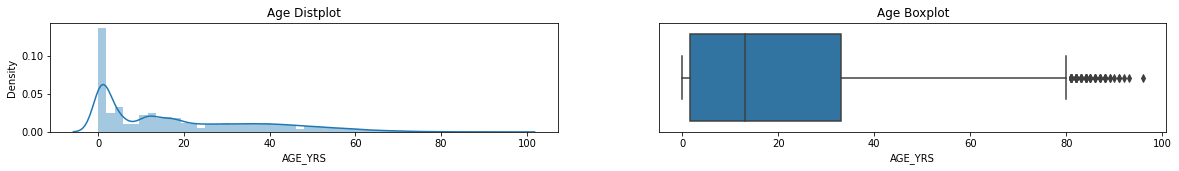

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(df_Hep['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(df_Hep['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
df_Hep.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/Hep_data.csv')

In [ ]:
df_Hep = pd.read_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/Hep_data.csv')

In [ ]:
df_Hep.head(30)

,Unnamed: 0,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,0,27294,OH,33.0,0,0,NaN,0,0,0.0,0,1,1990-11-07,1990-11-07,0.0,"Ansaid, Vit B12",NaN,h/o of asthma; treatment for OL & drug use 1 y...,0,NaN,HEP,MERCK & CO. INC.
1,1,27331,NY,33.0,0,0,NaN,0,0,0.0,0,2,1990-11-23,1990-11-23,0.0,"Dilantin, Tegretol",NaN,Hx of Epilepsy,0,NaN,HEP,MERCK & CO. INC.
2,2,27348,PA,22.0,1,0,NaN,0,1,0.0,0,2,1990-11-06,1990-11-12,6.0,NaN,NaN,G-6-pd deficiency,0,NaN,HEP,MERCK & CO. INC.
3,3,27349,MT,NaN,0,0,NaN,0,1,0.0,0,2,1990-11-19,1990-12-03,14.0,NaN,NaN,NaN,0,NaN,HEP,MERCK & CO. INC.
4,4,27350,FL,50.0,0,0,NaN,0,1,0.0,1,2,1990-04-16,NaN,NaN,NaN,NaN,NaN,0,NaN,HEP,MERCK & CO. INC.
5,5,27373,CA,NaN,2,0,NaN,0,0,0.0,0,0,1990-08-08,NaN,NaN,NaN,NaN,yeast,0,NaN,HEP,MERCK & CO. INC.
6,6,27427,VA,65.0,0,0,NaN,0,0,0.0,0,2,1990-10-10,1990-10-10,0.0,NaN,NaN,"Allergies: Pencillin, Codeine, Morphine",0,NaN,HEP,MERCK & CO. INC.
7,7,27494,TN,38.0,1,0,NaN,0,0,0.0,0,2,1990-07-02,1990-07-02,0.0,NaN,NaN,NaN,0,NaN,HEP,SMITHKLINE BEECHAM
8,8,27520,MO,32.0,0,0,NaN,0,0,0.0,0,1,1990-10-26,NaN,NaN,NaN,NaN,hx of rxn to DTP,0,NaN,HEP,SMITHKLINE BEECHAM
9,9,27521,CA,0.5,0,0,NaN,0,0,0.0,0,1,1991-01-15,1991-01-15,0.0,NaN,NaN,NaN,0,NaN,HEP,SMITHKLINE BEECHAM


In [ ]:
# df_Hep['OTHER_MEDS'] = df_Hep['OTHER_MEDS'].replace(np.nan, 0)
# df_Hep['OTHER_MEDS'] = df_Hep['OTHER_MEDS'].replace('none', 0)
# df_Hep['OTHER_MEDS'] = df_Hep['OTHER_MEDS'].replace('unknown', 0)

In [ ]:
# df_Hep.head(10)

In [ ]:
# def tokenize(column):
#     """Tokenizes a Pandas dataframe column and returns a list of tokens.

#     Args:
#         column: Pandas dataframe column (i.e. df['text']).

#     Returns:
#         tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

#     """

#     tokens = nltk.word_tokenize(column)
#     return [w for w in tokens if w.isalpha()]

In [ ]:
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# df_Hep['OTHER_MEDS'] = df_Hep.apply(lambda x: tokenize(x['OTHER_MEDS']), axis=1)
# df_Hep['OTHER_MEDS'].head()

In [ ]:
df_Hep['OTHER_MEDS'] = df_Hep['OTHER_MEDS'].str.lower()
df_Hep = df_Hep[['VAERS_ID','OTHER_MEDS']]
df_Hep.drop_duplicates( keep="first", inplace=True)

In [ ]:
df_Hep.head()

## Hep VAX Symptoms Cleanup

In [ ]:
df_symp 

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2596821,2071536,Fatigue,24.1,Herpes zoster,24.1,Injection site pain,24.1,Pyrexia,24.1,SARS-CoV-2 test,24.1
2596822,2071537,COVID-19,24.1,Fatigue,24.1,SARS-CoV-2 test,24.1,NaN,NaN,NaN,NaN
2596823,2071539,Body temperature,24.1,Dysphonia,24.1,Feeling cold,24.1,Muscle spasms,24.1,Paraesthesia,24.1
2596824,2071539,Pyrexia,24.1,Seizure,24.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.drop(['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'],axis=1,inplace=True)

In [ ]:
sanitycheck(df_symp)

,Column,Unique,Null Count,Null Percentage
5,SYMPTOM5,9315,1735996,66.85
4,SYMPTOM4,10010,1442418,55.55
3,SYMPTOM3,10759,1042173,40.13
2,SYMPTOM2,11464,521507,20.08
0,VAERS_ID,1951386,0,0.00
1,SYMPTOM1,11856,0,0.00


In [ ]:
df_Hep_sym = df_symp[df_symp.VAERS_ID.isin(Hep_vaersid)]

In [ ]:
df_Hep_sym.VAERS_ID.nunique()

103618

In [ ]:
df_Hep_sym[df_Hep_sym.duplicated(['VAERS_ID'])]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
199,25233,Pyrexia,NaN,NaN,NaN,NaN
243,25292,Pain,Paraesthesia,Paralysis,NaN,NaN
248,25296,Nuchal rigidity,Pharyngitis,Pyrexia,Red blood cell sedimentation rate increased,Vomiting
251,25298,Myalgia,Nausea,Pyrexia,Somnolence,NaN
257,25303,Lymphadenopathy,Myalgia,Nuchal rigidity,Pyrexia,Tremor
...,...,...,...,...,...,...
2564092,2027613,Hepatitis A,Hepatitis B antigen,Hepatitis E virus test,Hepatomegaly,Hepatosplenomegaly
2564093,2027613,Liver function test,Lymphadenopathy,Protein total normal,Splenomegaly,Ultrasound abdomen abnormal
2583975,2055036,Injection site reaction,NaN,NaN,NaN,NaN
2592735,2066448,Headache,Influenza like illness,Nausea,Pharyngitis,Pyrexia


In [ ]:
df_symp.duplicated(subset=['VAERS_ID']).sum ()

645440

In [ ]:
df_symp.loc[df_symp.duplicated(subset=['VAERS_ID']), :]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
58,25071,Injection site reaction,Nausea,NaN,NaN,NaN
62,25075,Lymphadenopathy,Neck pain,Paraesthesia,NaN,NaN
70,25082,Pyrexia,Visual disturbance,NaN,NaN,NaN
140,25152,Thrombocythaemia,White blood cell disorder,NaN,NaN,NaN
174,25199,Paraesthesia,Paralysis,NaN,NaN,NaN
...,...,...,...,...,...,...
2596808,2071496,Weight decreased,NaN,NaN,NaN,NaN
2596812,2071500,Electrocardiogram,Fibrin D dimer,Pericarditis,Pyrexia,NaN
2596819,2071534,Medication error,Myalgia,Sensory disturbance,Shoulder injury related to vaccine administration,Vaccination site movement impairment
2596820,2071534,Vaccination site pain,Wrong technique in product usage process,NaN,NaN,NaN


In [ ]:
cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
df_Hep_sym["Symptoms"] = df_Hep_sym[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
df_Hep_sym

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
27,25031,Rash,NaN,NaN,NaN,NaN,Rash
54,25068,Drug ineffective,Encephalitis,NaN,NaN,NaN,"Drug ineffective,Encephalitis"
120,25133,Back pain,Haematuria,NaN,NaN,NaN,"Back pain,Haematuria"
198,25233,Chills,Headache,Lymphadenopathy,Nausea,Pharyngitis,"Chills,Headache,Lymphadenopathy,Nausea,Pharyng..."
199,25233,Pyrexia,NaN,NaN,NaN,NaN,Pyrexia
...,...,...,...,...,...,...,...
2592734,2066448,Acute disseminated encephalomyelitis,Brain injury,CSF test,Computerised tomogram head,Electrocardiogram,"Acute disseminated encephalomyelitis,Brain inj..."
2592735,2066448,Headache,Influenza like illness,Nausea,Pharyngitis,Pyrexia,"Headache,Influenza like illness,Nausea,Pharyng..."
2594386,2067680,Blood immunoglobulin M normal,Hepatitis B,Hepatitis B core antibody negative,Hepatitis B e antigen,Hepatitis B e antigen negative,"Blood immunoglobulin M normal,Hepatitis B,Hepa..."
2594387,2067680,Hepatitis B surface antigen positive,Transaminases increased,NaN,NaN,NaN,"Hepatitis B surface antigen positive,Transamin..."


In [ ]:
df_Hep_sym = df_Hep_sym.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})

In [ ]:
#df_symp.head(30)

df_Hep_all_sym = df_Hep_sym.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()


In [ ]:
df_Hep_all_sym

,VAERS_ID,Symptoms
0,25011,"Convulsion,Pyrexia,Vomiting"
1,25031,Rash
2,25055,"Hepatic function abnormal,Hepatocellular damag..."
3,25056,"Hepatic cirrhosis,Malaise"
4,25057,Anaphylactoid reaction
...,...,...
103613,2067685,Product storage error
103614,2068483,"Blindness,Deafness,Dizziness"
103615,2068676,"Dysgeusia,Stomatitis"
103616,2069388,"Blood pressure increased,Electrocardiogram abn..."


In [ ]:
df_Hep_sym_id = df_Hep_all_sym.assign(Symptoms=df_Hep_all_sym.Symptoms.str.split(','))

In [ ]:
df_Hep_sym_id

,VAERS_ID,Symptoms
0,25011,"[Convulsion, Pyrexia, Vomiting]"
1,25031,[Rash]
2,25055,"[Hepatic function abnormal, Hepatocellular dam..."
3,25056,"[Hepatic cirrhosis, Malaise]"
4,25057,[Anaphylactoid reaction]
...,...,...
103613,2067685,[Product storage error]
103614,2068483,"[Blindness, Deafness, Dizziness]"
103615,2068676,"[Dysgeusia, Stomatitis]"
103616,2069388,"[Blood pressure increased, Electrocardiogram a..."


In [ ]:
df_Hep_sym1 = df_Hep_sym_id.explode('Symptoms')

In [ ]:
df_Hep_sym1

,VAERS_ID,Symptoms
0,25011,Convulsion
0,25011,Pyrexia
0,25011,Vomiting
1,25031,Rash
2,25055,Hepatic function abnormal
...,...,...
103615,2068676,Stomatitis
103616,2069388,Blood pressure increased
103616,2069388,Electrocardiogram abnormal
103617,2071046,Expired product administered


In [ ]:
df_Hep_all_sym.VAERS_ID.duplicated().sum()

0

In [ ]:
df_Hep_all_sym.nunique()

VAERS_ID    103618
Symptoms     51774
dtype: int64

In [ ]:
df_Hep_all_sym[df_Hep_all_sym.VAERS_ID ==902854]

,VAERS_ID,Symptoms


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df_Hep_all_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103618 entries, 0 to 103617
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  103618 non-null  int64 
 1   Symptoms  103618 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
df_Hep_all_sym[df_Hep_all_sym.VAERS_ID ==902854].Symptoms

Series([], Name: Symptoms, dtype: object)

In [ ]:
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(df_Hep_all_sym.Symptoms))

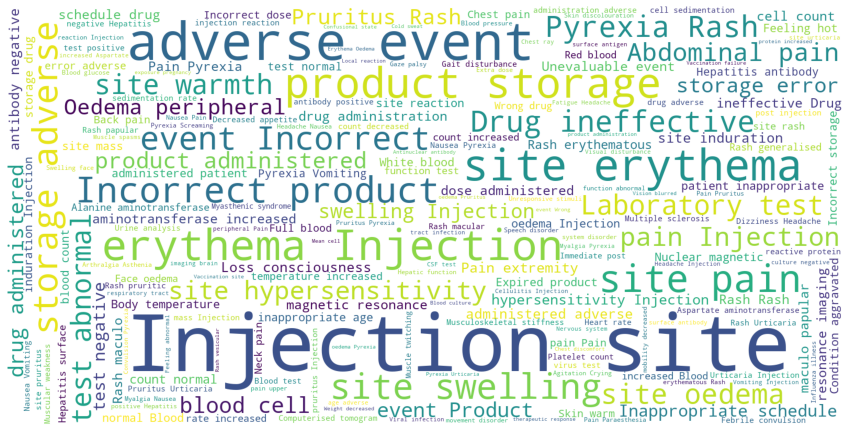

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
unique_ade = [val.strip() for sublist in df_Hep_all_sym.Symptoms.dropna().str.split(",").tolist() for val in sublist]

In [ ]:
len(unique_ade)

371033

In [ ]:
symptoms_summary = pd.DataFrame(unique_ade,columns=['symptoms']).value_counts(sort=True).reset_index().rename(columns={0:'count'})

In [ ]:
## Drop 15 Hep symptoms
symptoms_summary[0:51]

,symptoms,count
0,Pyrexia,14951
1,No adverse event,10451
2,Rash,8040
3,Injection site erythema,6900
4,Urticaria,6133
5,Headache,5860
6,Nausea,5588
7,Vomiting,5422
8,Pruritus,5419
9,Dizziness,5316


In [ ]:
symptoms_summary.symptoms[0:25]

0                       Pyrexia
1              No adverse event
2                          Rash
3       Injection site erythema
4                     Urticaria
5                      Headache
6                        Nausea
7                      Vomiting
8                      Pruritus
9                     Dizziness
10                         Pain
11          Injection site pain
12    Incorrect product storage
13                     Erythema
14      Injection site swelling
15                     Asthenia
16                      Myalgia
17                   Arthralgia
18             Drug ineffective
19                       Pallor
20                    Diarrhoea
21                 Paraesthesia
22                      Malaise
23                      Syncope
24                     Dyspnoea
Name: symptoms, dtype: object

In [ ]:
top25symp = symptoms_summary.symptoms[0:25]

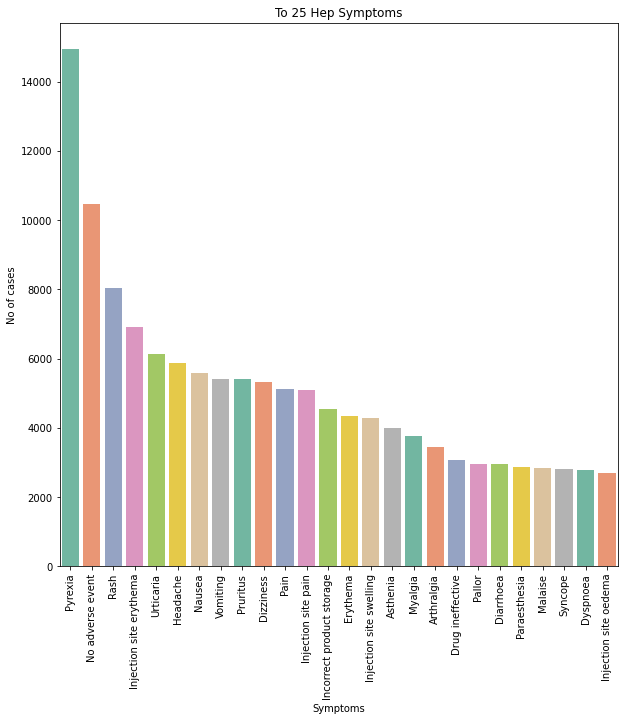

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.barplot(data=symptoms_summary[0:26], x="symptoms", y="count",palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('To 25 Hep Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('No of cases')
plt.show()

Stacked visualization of symptoms from the vaccine manufactures

In [ ]:

stacked_sym_manu = pd.merge(df_Hep_vax,df_Hep_sym1,on='VAERS_ID',how='left')

In [ ]:
stacked_sym_manu['VAX_MANU'].value_counts()

GLAXOSMITHKLINE BIOLOGICALS         168984
MERCK & CO. INC.                    142539
SMITHKLINE BEECHAM                   66927
DYNAVAX TECHNOLOGIES CORPORATION      1773
SANOFI PASTEUR                        1041
Name: VAX_MANU, dtype: int64

In [ ]:
stacked_sym_manu

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME,Symptoms
0,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Chest pain
1,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Diarrhoea
2,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Dyspnoea
3,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Nausea
4,27294,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Palpitations
...,...,...,...,...,...
381259,2067680,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Hepatitis B e antigen negative
381260,2067680,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Hepatitis B surface antigen positive
381261,2067680,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Transaminases increased
381262,2069388,HEP,GLAXOSMITHKLINE BIOLOGICALS,HEP B (ENGERIX-B),Blood pressure increased


In [ ]:
dfs = stacked_sym_manu[stacked_sym_manu.Symptoms.isin(top25symp)]

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU)

VAX_MANU,DYNAVAX TECHNOLOGIES CORPORATION,GLAXOSMITHKLINE BIOLOGICALS,MERCK & CO. INC.,SANOFI PASTEUR,SMITHKLINE BEECHAM
Symptoms,,,,,
Arthralgia,13,1105,1238,13,1187
Asthenia,17,1228,1407,15,1427
Diarrhoea,8,1070,1235,3,708
Dizziness,59,2644,1680,3,1167
Drug ineffective,0,366,562,1,2133
Dyspnoea,19,1151,992,4,682
Erythema,30,2652,1512,4,293
Headache,49,2422,1991,7,1608
Incorrect product storage,0,100,4496,2,0


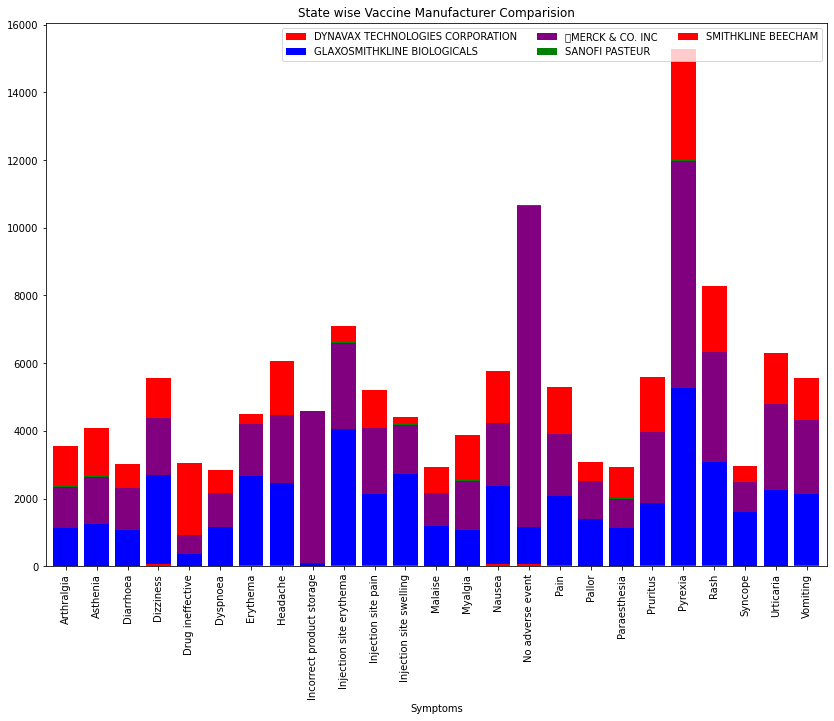

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU).plot.bar(stacked=True,width = .8,figsize=(14, 10),color=['red', 'blue', 'purple', 'green'])
plt.legend(['DYNAVAX TECHNOLOGIES CORPORATION', 'GLAXOSMITHKLINE BIOLOGICALS','	MERCK & CO. INC','SANOFI PASTEUR','SMITHKLINE BEECHAM'], loc='upper right', ncol = 3)
plt.title('State wise Vaccine Manufacturer Comparision')
plt.show()